In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd

# Importing the Datasets

import pandas as pd
dev_data = pd.read_json('/content/bias_articles_dev.json')
train_data = pd.read_json('/content/bias_articles_train.json')
test_data = pd.read_json('/content/bias_articles_test.json')

In [2]:
def removenull(data):
    # Removing null rows
    ind = np.where(data['body'].isnull() == True)[0].tolist()
    data = data.drop(ind)
    data = data.reset_index()
    return data

train_data = removenull(train_data)
dev_data = removenull(dev_data)

In [9]:
train_data.head()

,index,body,bias,id,title
0,0,A Republican staffer on Friday apologized for...,Right,0.0,GOP Staffer Apologizes For Lecturing Obama Dau...
1,1,President Donald Trump said he’s considering ...,Left,1.0,Donald Trump Vows To End Birthright Citizenship
2,2,Setting the tone for the 112th Congress — in ...,Right,2.0,House Reading of Constitution Is Not Without I...
3,3,"Like many conservative Republicans, Mitt Romn...",Left,3.0,"Romney Reaffirms Opposition to Marriage, or Un..."
4,4,HOUSTON — The decision by Republican conventi...,Left,4.0,"With Abortion in the Spotlight, a Challenge fo..."


<BarContainer object of 3 artists>

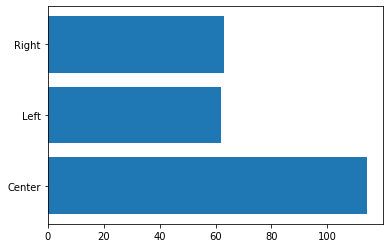

In [3]:
uniq_labels  = np.unique(train_data['bias'])
count = []
for u in uniq_labels:
  count.append(len(train_data.body[train_data.bias == u]))

import matplotlib.pyplot as plt
plt.barh(uniq_labels,count)


In [ ]:
# # Preprocessing of Data

# import spacy
# import numpy as np
# #from spacy.lang.en.stop_words import STOP_WORDS
# #nlp = en_core_web_sm.load()
# nlp = spacy.load("en_core_web_sm",disable=["tagger", "parser"])
# def preprocess(text):
#     # TODO: Replace the next line with your own code.
#     doc = nlp(text)
#     token_list = []
#     for token in doc:
#         if token.is_stop == False and token.lemma_.isalpha() and len(token) > 3:
#             token_list.append(token.lemma_)
#     return(token_list)

In [ ]:
# train_data['PreProcessedBody'] = None
# for i in range(len(train_data)):
#     # print(i)
#     train_data['PreProcessedBody'][i] = " ".join(preprocess(train_data['body'][i]))


In [ ]:
# dev_data['PreProcessedBody'] = None
# for i in range(len(dev_data)):
#     # print(i)
#     dev_data['PreProcessedBody'][i] = " ".join(preprocess(dev_data['body'][i]))


In [3]:
# Right - 0, Left - 1, Center - 2
train_sentences = train_data['body']
train_labels = pd.factorize(train_data['bias'])[0]

validation_sentences = dev_data['body']
validation_labels = pd.factorize(dev_data['bias'])[0]

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# vectorizer = CountVectorizer(ngram_range=(1,1))
vectorizer = CountVectorizer(ngram_range=(1,2))
pipe_LR = Pipeline([('countvectorizer', vectorizer),('LR',LogisticRegression())])
pipe_LR.fit(train_sentences, train_labels)
pred_LR = pipe_LR.predict(validation_sentences)
print(classification_report(validation_labels, pred_LR))

              precision    recall  f1-score   support

           0       0.67      0.27      0.38        15
           1       0.20      0.14      0.17         7
           2       0.32      0.75      0.44         8

    accuracy                           0.37        30
   macro avg       0.39      0.39      0.33        30
weighted avg       0.46      0.37      0.35        30



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [21]:
from sklearn.svm import SVC
pipe_SVC = Pipeline([('countvectorizer', vectorizer),('SVC',SVC())])
pipe_SVC.fit(train_sentences, train_labels)
pred_SVC = pipe_SVC.predict(validation_sentences)
print(classification_report(validation_labels, pred_SVC))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.00      0.00      0.00         7
           2       0.27      1.00      0.42         8

    accuracy                           0.27        30
   macro avg       0.09      0.33      0.14        30
weighted avg       0.07      0.27      0.11        30



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
from sklearn.tree import DecisionTreeClassifier
pipe_DT = Pipeline([('countvectorizer', vectorizer),('decisiontree',DecisionTreeClassifier(max_depth=50))])
pipe_DT.fit(train_sentences, train_labels)
pred_DT = pipe_DT.predict(validation_sentences)
print(classification_report(validation_labels, pred_DT))

              precision    recall  f1-score   support

           0       0.45      0.33      0.38        15
           1       0.25      0.14      0.18         7
           2       0.20      0.38      0.26         8

    accuracy                           0.30        30
   macro avg       0.30      0.28      0.28        30
weighted avg       0.34      0.30      0.30        30



In [72]:
# Default parameters for XGB, ngram = 1,1
from xgboost import XGBClassifier
pipe_XGB = Pipeline([('countvectorizer', vectorizer),('XGB',XGBClassifier())])
pipe_XGB.fit(train_sentences, train_labels)
pred_XGB = pipe_XGB.predict(validation_sentences)
print(classification_report(validation_labels, pred_XGB))

              precision    recall  f1-score   support

           0       0.57      0.27      0.36        15
           1       0.20      0.14      0.17         7
           2       0.33      0.75      0.46         8

    accuracy                           0.37        30
   macro avg       0.37      0.39      0.33        30
weighted avg       0.42      0.37      0.34        30



In [17]:
# Default parameters, ngram = 1,2, balanced_data

g = train_data.groupby('bias')
bal_train_data = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))

train_sentences = bal_train_data['body']
train_labels = pd.factorize(bal_train_data['bias'])[0]

validation_sentences = dev_data['body']
validation_labels = pd.factorize(dev_data['bias'])[0]

from xgboost import XGBClassifier
pipe_XGB = Pipeline([('countvectorizer', vectorizer),('XGB',XGBClassifier())])
pipe_XGB.fit(train_sentences, train_labels)
pred_XGB = pipe_XGB.predict(validation_sentences)
print(classification_report(validation_labels, pred_XGB))

              precision    recall  f1-score   support

           0       0.55      0.40      0.46        15
           1       0.25      0.43      0.32         7
           2       0.29      0.25      0.27         8

    accuracy                           0.37        30
   macro avg       0.36      0.36      0.35        30
weighted avg       0.41      0.37      0.38        30



In [19]:
# Default parameters, ngram = 1,2
from xgboost import XGBClassifier
pipe_XGB = Pipeline([('countvectorizer', vectorizer),('XGB',XGBClassifier())])
pipe_XGB.fit(train_sentences, train_labels)
pred_XGB = pipe_XGB.predict(validation_sentences)
print(classification_report(validation_labels, pred_XGB))

              precision    recall  f1-score   support

           0       0.71      0.33      0.45        15
           1       0.33      0.29      0.31         7
           2       0.35      0.75      0.48         8

    accuracy                           0.43        30
   macro avg       0.47      0.46      0.41        30
weighted avg       0.53      0.43      0.43        30



In [73]:
# Changed hyperparameters, ngram = 1,1
from xgboost import XGBClassifier
pipe_XGB = Pipeline([('countvectorizer', vectorizer),('XGB',XGBClassifier(max_depth = 5,n_estimators=500,n_jobs=2))])
pipe_XGB.fit(train_sentences, train_labels)
pred_XGB = pipe_XGB.predict(validation_sentences)
print(classification_report(validation_labels, pred_XGB))

              precision    recall  f1-score   support

           0       0.33      0.13      0.19        15
           1       0.38      0.43      0.40         7
           2       0.25      0.50      0.33         8

    accuracy                           0.30        30
   macro avg       0.32      0.35      0.31        30
weighted avg       0.32      0.30      0.28        30



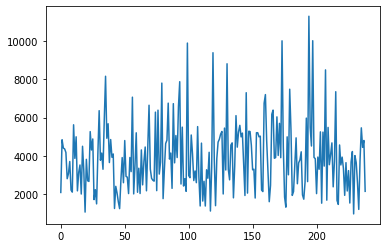

In [4]:
# Plot of length of reviews

senlen = [len(train_sentences[i]) for i in range(len(train_sentences))]

import matplotlib.pyplot as plt

plt.plot(np.arange(len(senlen)),senlen)

In [6]:
print('Average length of sentences in tarining dataset')
np.mean(senlen)

Average length of sentences in tarining dataset


3912.9539748953976

In [23]:
import sys
import numpy as np
import random as rn
import pandas as pd
import torch
#from pytorch_pretrained_bert import BertModel
from torch import nn
#from pytorch_pretrained_bert import BertTokenizer
from keras.preprocessing.sequence import pad_sequences
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from torch.optim import Adam
from torch.nn.utils import clip_grad_norm_
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline


In [25]:
# ! pip install transformers

     |████████████████████████████████| 2.8 MB 5.4 MB/s 
     |████████████████████████████████| 52 kB 1.6 MB/s 
     |████████████████████████████████| 636 kB 45.5 MB/s 
     |████████████████████████████████| 3.3 MB 27.4 MB/s 
     |████████████████████████████████| 895 kB 25.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [26]:
from transformers import BertTokenizer, BertModel, BertConfig
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [27]:
# Tokenizing inputs and adding special tokens

def input_id(input_review):
    input_ids = []
    MAX_LEN = 256
    for r in input_review:
        encoded_sent = tokenizer.encode(r,add_special_tokens = True) # Special tokens '[CLS]' and '[SEP]'
        input_ids.append(encoded_sent)
    return input_ids
train_id = input_id(train_sentences)
val_id = input_id(validation_sentences)

Token indices sequence length is longer than the specified maximum sequence length for this model (1034 > 512). Running this sequence through the model will result in indexing errors


In [28]:
# Padding the Tokenized IDs
from keras.preprocessing.sequence import pad_sequences
padded_train_id = pad_sequences(train_id, maxlen=256 , truncating="post", padding="post")
padded_val_id = pad_sequences(val_id, maxlen=256 , truncating="post", padding="post")


In [29]:
# Masking the padded ID's

def masking(pid):
    attention_masks = []

    for r in pid:
    
        # Generating attention mask for sentences.
        #   - when there is 0 present as token id we are going to set mask as 0.
        #   - we are going to set mask 1 for all non-zero positive input id.
        att_mask = [int(token_id > 0) for token_id in r]
        attention_masks.append(att_mask)

    return attention_masks

train_mask = masking(padded_train_id)
val_mask = masking(padded_val_id)

In [30]:
#changing the numpy arrays into tensors for working on GPU.
import torch

tr_inputs = torch.tensor(padded_train_id)
val_inputs = torch.tensor(padded_val_id)

tr_labels = torch.tensor(train_labels.reshape(-1, 1)).float()
val_labels = torch.tensor(validation_labels.reshape(-1, 1)).float()

tr_masks = torch.tensor(train_mask)
val_masks = torch.tensor(val_mask)

from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Deciding the batch size for training.

batch_size = 16

#DataLoader for our training set.
train_data = TensorDataset(tr_inputs, tr_masks, tr_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# DataLoader for our validation(test) set.
validation_data = TensorDataset(val_inputs, val_masks, val_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [31]:
# Building custom BERT model with additional Classification layer

class BertClassifier(nn.Module):
    
    def __init__(self, n_classes = 3):
        super(BertClassifier, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.drop = nn.Dropout(p=0.3)
        self.out = nn.Linear(768, n_classes)
        self.softmax = nn.Softmax(dim=1)
  
    def forward(self, input_ids, attention_mask):
        
        _, pooled_output = self.bert(
        input_ids=input_ids,
        attention_mask=attention_mask,
        return_dict=False
    )
        output = self.drop(pooled_output)
        #print(torch.max(output,dim = 1))
        return self.out(output)

In [32]:
# Checking for GPU processors
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

torch.cuda.empty_cache()     # Clearing Cache space for fresh Model run


In [33]:
# Assigning model to GPU

model = BertClassifier()
model = model.to(device)

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [34]:
# Batch size: 16, 32
# Learning rate (Adam): 5e-5, 3e-5, 2e-5
# Number of epochs: 2, 3, 4


EPOCHS = 3

optimizer = Adam(model.parameters(), lr=3e-5)
total_steps = len(train_dataloader) * EPOCHS
loss_fn = nn.CrossEntropyLoss().to(device)

In [40]:
# Training the Model

for epoch_num in range(EPOCHS):
    model.train()
    train_loss = 0
    for step_num, batch_data in enumerate(train_dataloader):
        token_ids, masks, targets = tuple(t.to(device).long() for t in batch_data)

        outputs = model(
      token_ids,
      masks
    )
        #print(len(targets))
        targets = targets.reshape((1,len(targets)))

        _, preds = torch.max(outputs, dim=1)
        loss = loss_fn(outputs, targets[0])

        train_loss += loss.item()
        
        
        model.zero_grad()
        loss.backward()
        

        clip_grad_norm_(parameters=model.parameters(), max_norm=1.0)
        optimizer.step()
        
        clear_output(wait=True)
        print('Epoch: ', epoch_num + 1)
        print("\r" + "{0}/{1} loss: {2} ".format(step_num, len(train_data) / batch_size, train_loss / (step_num + 1)))

Epoch:  3
14/14.9375 loss: 1.0658514618873596 


In [41]:
# Evaluating and Predicting on the validation dataset

model.eval()
bert_predicted = []
with torch.no_grad():
    for step_num, batch_data in enumerate(validation_dataloader):
        token_ids, masks, targets = tuple(t.to(device).long() for t in batch_data)

        outputs = model(
      token_ids,
      masks
    )
        
        targets = targets.reshape((1,len(targets)))

        _, preds = torch.max(outputs, dim=1)
        bert_predicted.append(preds)
    
pred = []
for i in range(len(bert_predicted)):
    for j in range(len(bert_predicted[i])):
        pred.append(bert_predicted[i][j])
    
pred = torch.tensor(pred).numpy()
        

In [24]:
# Batch Size = 16, Epochs = 3, learning rate = 3e-5, original text
print(classification_report(val_labels, pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        15
         1.0       0.00      0.00      0.00         7
         2.0       0.27      1.00      0.42         8

    accuracy                           0.27        30
   macro avg       0.09      0.33      0.14        30
weighted avg       0.07      0.27      0.11        30



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Batch Size = 32, Epochs = 3, learning rate = 2e-5
print(classification_report(val_labels, pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        15
         1.0       0.00      0.00      0.00         7
         2.0       0.27      1.00      0.42         8

    accuracy                           0.27        30
   macro avg       0.09      0.33      0.14        30
weighted avg       0.07      0.27      0.11        30



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Batch Size = 16, Epochs = 3, learning rate = 5e-5
print(classification_report(val_labels, pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        15
         1.0       0.00      0.00      0.00         7
         2.0       0.27      1.00      0.42         8

    accuracy                           0.27        30
   macro avg       0.09      0.33      0.14        30
weighted avg       0.07      0.27      0.11        30



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Batch Size = 8, Epochs = 3, learning rate = 5e-5
print(classification_report(val_labels, pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        15
         1.0       0.00      0.00      0.00         7
         2.0       0.27      1.00      0.42         8

    accuracy                           0.27        30
   macro avg       0.09      0.33      0.14        30
weighted avg       0.07      0.27      0.11        30



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [60]:
train_labels = pd.get_dummies(train_labels)
validation_labels = pd.get_dummies(validation_labels)

In [61]:
# tokenize sentences
tokenizer = Tokenizer(num_words = 2500)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

# convert train dataset to sequence and pad sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=120)

# convert validation dataset to sequence and pad sequences
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, padding='post', maxlen=120)

In [54]:
# Word Embedding

# model initialization
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(word_index), output_dim= 100, input_length=120),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

# compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 120, 100)          1222500   
_________________________________________________________________
global_average_pooling1d_3 ( (None, 100)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 24)                2424      
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 75        
Total params: 1,224,999
Trainable params: 1,224,999
Non-trainable params: 0
_________________________________________________________________


In [62]:
# fit model
val_labels = np.array(validation_labels.idxmax(axis=1))
num_epochs = 10
history = model.fit(train_padded, train_labels, 
                    epochs=num_epochs)

# predict values
pred = model.predict(validation_padded)
ind_pred = []
for i in range(len(pred)):
    ind_pred.append(np.where(pred[i] == max(pred[i]))[0])
print(classification_report(val_labels, ind_pred))


Epoch 1/10
8/8 [==============================] - 0s 6ms/step - loss: 0.8649 - accuracy: 0.6109
Epoch 2/10
8/8 [==============================] - 0s 6ms/step - loss: 0.8165 - accuracy: 0.6904
Epoch 3/10
8/8 [==============================] - 0s 6ms/step - loss: 0.7640 - accuracy: 0.7197
Epoch 4/10
8/8 [==============================] - 0s 6ms/step - loss: 0.7086 - accuracy: 0.7406
Epoch 5/10
8/8 [==============================] - 0s 6ms/step - loss: 0.6495 - accuracy: 0.7573
Epoch 6/10
8/8 [==============================] - 0s 6ms/step - loss: 0.5910 - accuracy: 0.8033
Epoch 7/10
8/8 [==============================] - 0s 6ms/step - loss: 0.5327 - accuracy: 0.8954
Epoch 8/10
8/8 [==============================] - 0s 6ms/step - loss: 0.4772 - accuracy: 0.9456
Epoch 9/10
8/8 [==============================] - 0s 6ms/step - loss: 0.4232 - accuracy: 0.9582
Epoch 10/10
8/8 [==============================] - 0s 6ms/step - loss: 0.3729 - accuracy: 0.9707
              precision    recall  f1-s

In [34]:
# LSTM
model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(word_index), output_dim= 100, input_length=120),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

# compile model
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model summary
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 100)          1222500   
_________________________________________________________________
bidirectional (Bidirectional (None, 120, 128)          84480     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_2 (Dense)              (None, 24)                1560      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 75        
Total params: 1,349,831
Trainable params: 1,349,831
Non-trainable params: 0
_________________________________________________________________


In [63]:
# fit model
num_epochs = 10
history1 = model1.fit(train_padded, train_labels, 
                    epochs=num_epochs)

# predict values
pred1 = model1.predict(validation_padded)
ind_pred = []
for i in range(len(pred)):
    ind_pred.append(np.where(pred1[i] == max(pred1[i]))[0])
print(classification_report(val_labels, ind_pred))

Epoch 1/10
8/8 [==============================] - 1s 106ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 2/10
8/8 [==============================] - 1s 108ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 3/10
8/8 [==============================] - 1s 107ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 4/10
8/8 [==============================] - 1s 106ms/step - loss: 0.0110 - accuracy: 0.9958
Epoch 5/10
8/8 [==============================] - 1s 106ms/step - loss: 0.0152 - accuracy: 1.0000
Epoch 6/10
8/8 [==============================] - 1s 108ms/step - loss: 0.0075 - accuracy: 1.0000
Epoch 7/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 8/10
8/8 [==============================] - 1s 106ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 9/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0071 - accuracy: 1.0000
Epoch 10/10
8/8 [==============================] - 1s 106ms/step - loss: 0.0032 - accuracy: 1.0000
              preci

In [36]:
# GRU

model3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(word_index), output_dim= 100, input_length=120),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

# compile model
model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model summary
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 100)          1222500   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               63744     
_________________________________________________________________
dense_4 (Dense)              (None, 24)                3096      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 75        
Total params: 1,289,415
Trainable params: 1,289,415
Non-trainable params: 0
_________________________________________________________________


In [64]:
# fit model
num_epochs = 10
history3 = model3.fit(train_padded, train_labels, 
                    epochs=num_epochs)

# predict values
pred3 = model3.predict(validation_padded)
ind_pred = []
for i in range(len(pred)):
    ind_pred.append(np.where(pred3[i] == max(pred3[i]))[0])
print(classification_report(val_labels, ind_pred))

Epoch 1/10
8/8 [==============================] - 0s 54ms/step - loss: 0.0635 - accuracy: 0.9916
Epoch 2/10
8/8 [==============================] - 0s 50ms/step - loss: 0.0209 - accuracy: 1.0000
Epoch 3/10
8/8 [==============================] - 0s 51ms/step - loss: 0.0095 - accuracy: 1.0000
Epoch 4/10
8/8 [==============================] - 0s 52ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 5/10
8/8 [==============================] - 0s 50ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 6/10
8/8 [==============================] - 0s 52ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 7/10
8/8 [==============================] - 0s 51ms/step - loss: 8.8361e-04 - accuracy: 1.0000
Epoch 8/10
8/8 [==============================] - 0s 50ms/step - loss: 7.3734e-04 - accuracy: 1.0000
Epoch 9/10
8/8 [==============================] - 0s 53ms/step - loss: 6.1384e-04 - accuracy: 1.0000
Epoch 10/10
8/8 [==============================] - 0s 52ms/step - loss: 5.3315e-04 - accuracy: 1.0000
             

In [ ]:
# embeddings_index = {}
# with open('/kaggle/input/glove-embeddings/glove.6B.100d.txt') as f:
#     for line in f:
#         values = line.split()
#         word = values[0]
#         coefs = np.asarray(values[1:], dtype='float32')
#         embeddings_index[word] = coefs

# embeddings_matrix = np.zeros((len(word_index) + 1, 100))

# for word, i in word_index.items():
#     embedding_vector = embeddings_index.get(word)
#     if embedding_vector is not None:
#         embeddings_matrix[i] = embedding_vector

In [ ]:
# # model initialization
# model4 = tf.keras.Sequential([
#     tf.keras.layers.Embedding(input_dim=len(word_index)+1, output_dim= 100, input_length=120, weights=[embeddings_matrix], trainable=False),
#     tf.keras.layers.GlobalAveragePooling1D(),
#     tf.keras.layers.Dense(24, activation='relu'),
#     tf.keras.layers.Dense(4, activation='sigmoid')
# ])

# # compile model
# model4.compile(loss='binary_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

# # model summary
# model4.summary()


In [ ]:
# # fit model
# num_epochs = 10
# history4 = model4.fit(train_padded, train_labels, 
#                     epochs=num_epochs, verbose=2, 
#                     validation_split=0.2)

# # predict values
# pred4 = model4.predict(validation_padded)
# ind_pred = []
# for i in range(len(pred)):
#     ind_pred.append(np.where(pred4[i] == max(pred4[i]))[0])
# print(classification_report(val_labels, ind_pred))